In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from clawpack.geoclaw import topotools
import pandas as pd
import os

<AxesSubplot:>

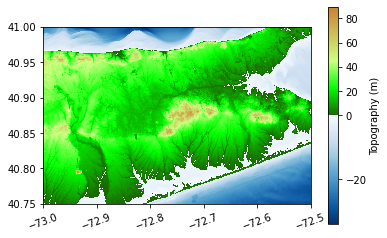

In [5]:
topo_path = '/home/catherinej/bathymetry/manually_altered_bathymetry/moriches_with_breach_open_inlet.nc'
topo = topotools.Topography(topo_path, topo_type=4)
topo.plot()

In [3]:
inlet = topo
# inlet.plot()

In [4]:
df = pd.read_csv('/home/catherinej/breach_loc.csv')
fr = [-72.8, -72.70, 40.75, 40.80]
z = np.array(inlet.Z)

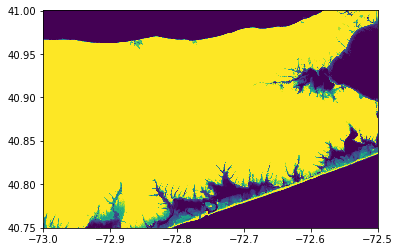

In [12]:
w = -72.756005
s = 40.764075
e = -72.752890
n = 40.768858
inlet_test = topo.Z
for i, lon in enumerate(topo.x):
        if (lon > w) and (lon <= e):
            for j, lat in enumerate(topo.y):
                if (lat > s) and (lat <= n):
                    if inlet_test[j,i] <= 0:
                        inlet_test[j,i] = 2.0
plt.pcolormesh(topo.X, topo.Y, inlet_test, vmin=-2, vmax=2)

In [5]:
%%timeit
# for idx in range(6):
#     print(idx)
for i, lon in enumerate(topo.x):
    for j, lat in enumerate(topo.y):
        if (lon > df.loc[0]['West']) and (lon < df.loc[0]['East']):
            if (lat > df.loc[0]['South']) and (lat < df.loc[0]['North']):
                if inlet.Z[j,i] >= 0:
                    # print('anything here?')
                    inlet.Z[j,i] = -0.5
i2 = inlet.crop(fr)
# i2.plot()

KeyboardInterrupt: 

In [45]:
inlet.write('moriches_closed.nc')

In [11]:
df.loc[0]['West']
-72.72995 >= df.loc[0]['West']

True

<ipython-input-43-ca0a519ba530>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(topo.X, topo.Y, z, vmin=-2, vmax=2)


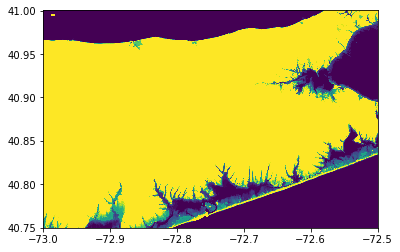

In [43]:
plt.pcolormesh(topo.X, topo.Y, z, vmin=-2, vmax=2)

In [28]:
# n = 40.767044
# s = 40.759989
# w = -72.766828
# e = -72.763560
inlet = topo
df = pd.read_csv('/home/catherinej/breach_loc.csv')
fr = [-72.8, -72.70, 40.75, 40.80]

In [29]:

df

,West,East,South,North,Center
0,-72.730156,-72.722699,40.770121,40.776830,-72.728378
1,-72.741864,-72.736314,40.767005,40.771566,-72.739811
2,-72.746720,-72.742147,40.765269,40.770601,-72.744832
3,-72.757493,-72.756182,40.764085,40.770000,-72.758208
4,-72.766651,-72.764132,40.759000,40.766711,-72.765685
5,-72.772045,-72.769959,40.758000,40.765000,-72.770963


In [30]:
%%timeit
for idx in range(6):
    w = df.loc[idx]['West']
    e = df.loc[idx]['East']
    n = df.loc[idx]['North']
    s = df.loc[idx]['South']
    for i, lon in enumerate(topo.x):
        if (lon > w) and (lon < e):
            for j, lat in enumerate(topo.y):
                if (lat > s) and (lat < n):
                    if inlet.Z[j,i] >= 0:
                        # print('anything here?')
                        inlet.Z[j,i] = -2.0
# i2 = inlet.crop(fr)
# i2.plot()
# inlet.plot()

7.87 s ± 42.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
inl = topo
# for idx in range(6):
#     island = ( (inl.Y < i0) * bathymetry +
#                  (Y >= i0) * (Y <= i1)*(np.ones(bathymetry.shape)*l1) +
#                  (Y > i1) * bathymetry)*(X <= -80) + (X > -80)*bathymetry
inl1 = [ -0.5 for x in x in topo.x if x > w and x <= e] 

SyntaxError: invalid syntax (<unknown>, line 6)

In [31]:
inlet.write('moriches_6_breach_2m.nc')

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

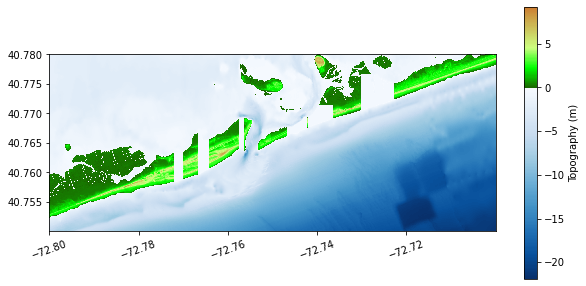

In [32]:
fr = [-72.8, -72.70, 40.75, 40.78]
i2 = inlet.crop(fr)
plt.figure(figsize=(10,5))
i2.plot(fig_kwargs={'figsize':(10,5)})

In [19]:
i2.plot?

Signature:
i2.plot(
    axes=None,
    contour_levels=None,
    contour_kwargs={},
    limits=None,
    cmap=None,
    add_colorbar=True,
    plot_box=False,
    long_lat=True,
    fig_kwargs={},
    data_break=0.0,
    cb_kwargs={},
)
Docstring:
Plot the topography.

:Input:
 - *axes* (matplotlib.pyplot.axes) - If passed in, plot will be
   added to this axes.  Otherwise a new plot figure will be created
   (using *fig_kwargs*) and a new *axes* object created and returned.
 - *contour_levels* (list) - levels for contour lines if these are 
   to be added (default *None*).  Set to [0.] to plot shoreline.
 - *contour_kwargs* (dict) - keyword arguments to be passed to
   contour command, e.g. {'colors':'r', 'linestyles': '-'}.
   Default is empty dict.
 - *limits* (list) - (min, max) of topo values for color map.  
   Defaults to None, in which case (self.Z.min(), self.Z.max()) used.
 - *cmap* (matplotlib.colors.Colormap) - colormap, defaults to
   specialized map with blues for bathymet

### Reload to change original to have breach and inlet

<AxesSubplot:>

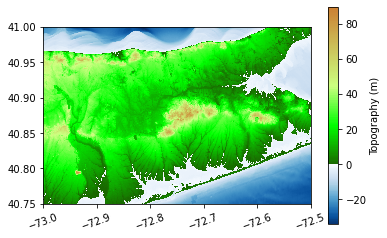

In [53]:
topo_path = '/home/catherinej/bathymetry/moriches/m_inlet.nc'
topo = topotools.Topography(topo_path, topo_type=4)
topo.plot() 

<AxesSubplot:>

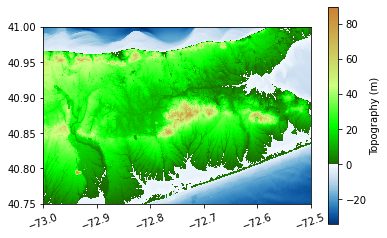

In [27]:
inl = topotools.Topography('moriches_6_breach.nc', topo_type=4)
inl.plot()

<AxesSubplot:>

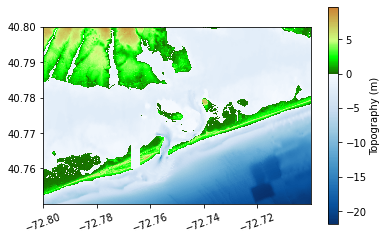

In [58]:
for i, lon in enumerate(topo.x):
    for j, lat in enumerate(topo.y):
        if (lon > w) and (lon < e):
            if (lat > s) and (lat < n):
                if inlet.Z[j,i] >= 0:
                    # print('anything here?')
                    inlet.Z[j,i] = -0.01
i2 = inlet.crop(fr)
i2.plot()

In [57]:
inlet.write('moriches_inlet_breach.nc')